In [98]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import cv2
import os
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam_v2

In [79]:
from PIL import Image
import pandas as pd
import tensorflow.keras as keras
import warnings
warnings.filterwarnings('ignore')

In [51]:
## switch the current directory
chd = os.chdir('C:/Users/ranja/Desktop/Traffic CNN model')
path = 'C:/Users/ranja/Desktop/Traffic CNN model'

### Dataset details:
-More than 40 classes
-More than 50,000 images in total

In [47]:
os.listdir(ch)

['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']

In [53]:
meta = os.listdir(path+"/"+'Meta')

In [54]:
meta

['.~lock.ClassesInformation.ods#',
 '.~lock.ClassesInformationStrong.ods#',
 '0.png',
 '1.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '2.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '3.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '4.png',
 '40.png',
 '41.png',
 '42.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png']

In [55]:
#meta = os.listdir(chd+'Meta')
meta.remove('.~lock.ClassesInformation.ods#')
meta.remove('.~lock.ClassesInformationStrong.ods#')
meta

['0.png',
 '1.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '2.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '3.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '4.png',
 '40.png',
 '41.png',
 '42.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png']

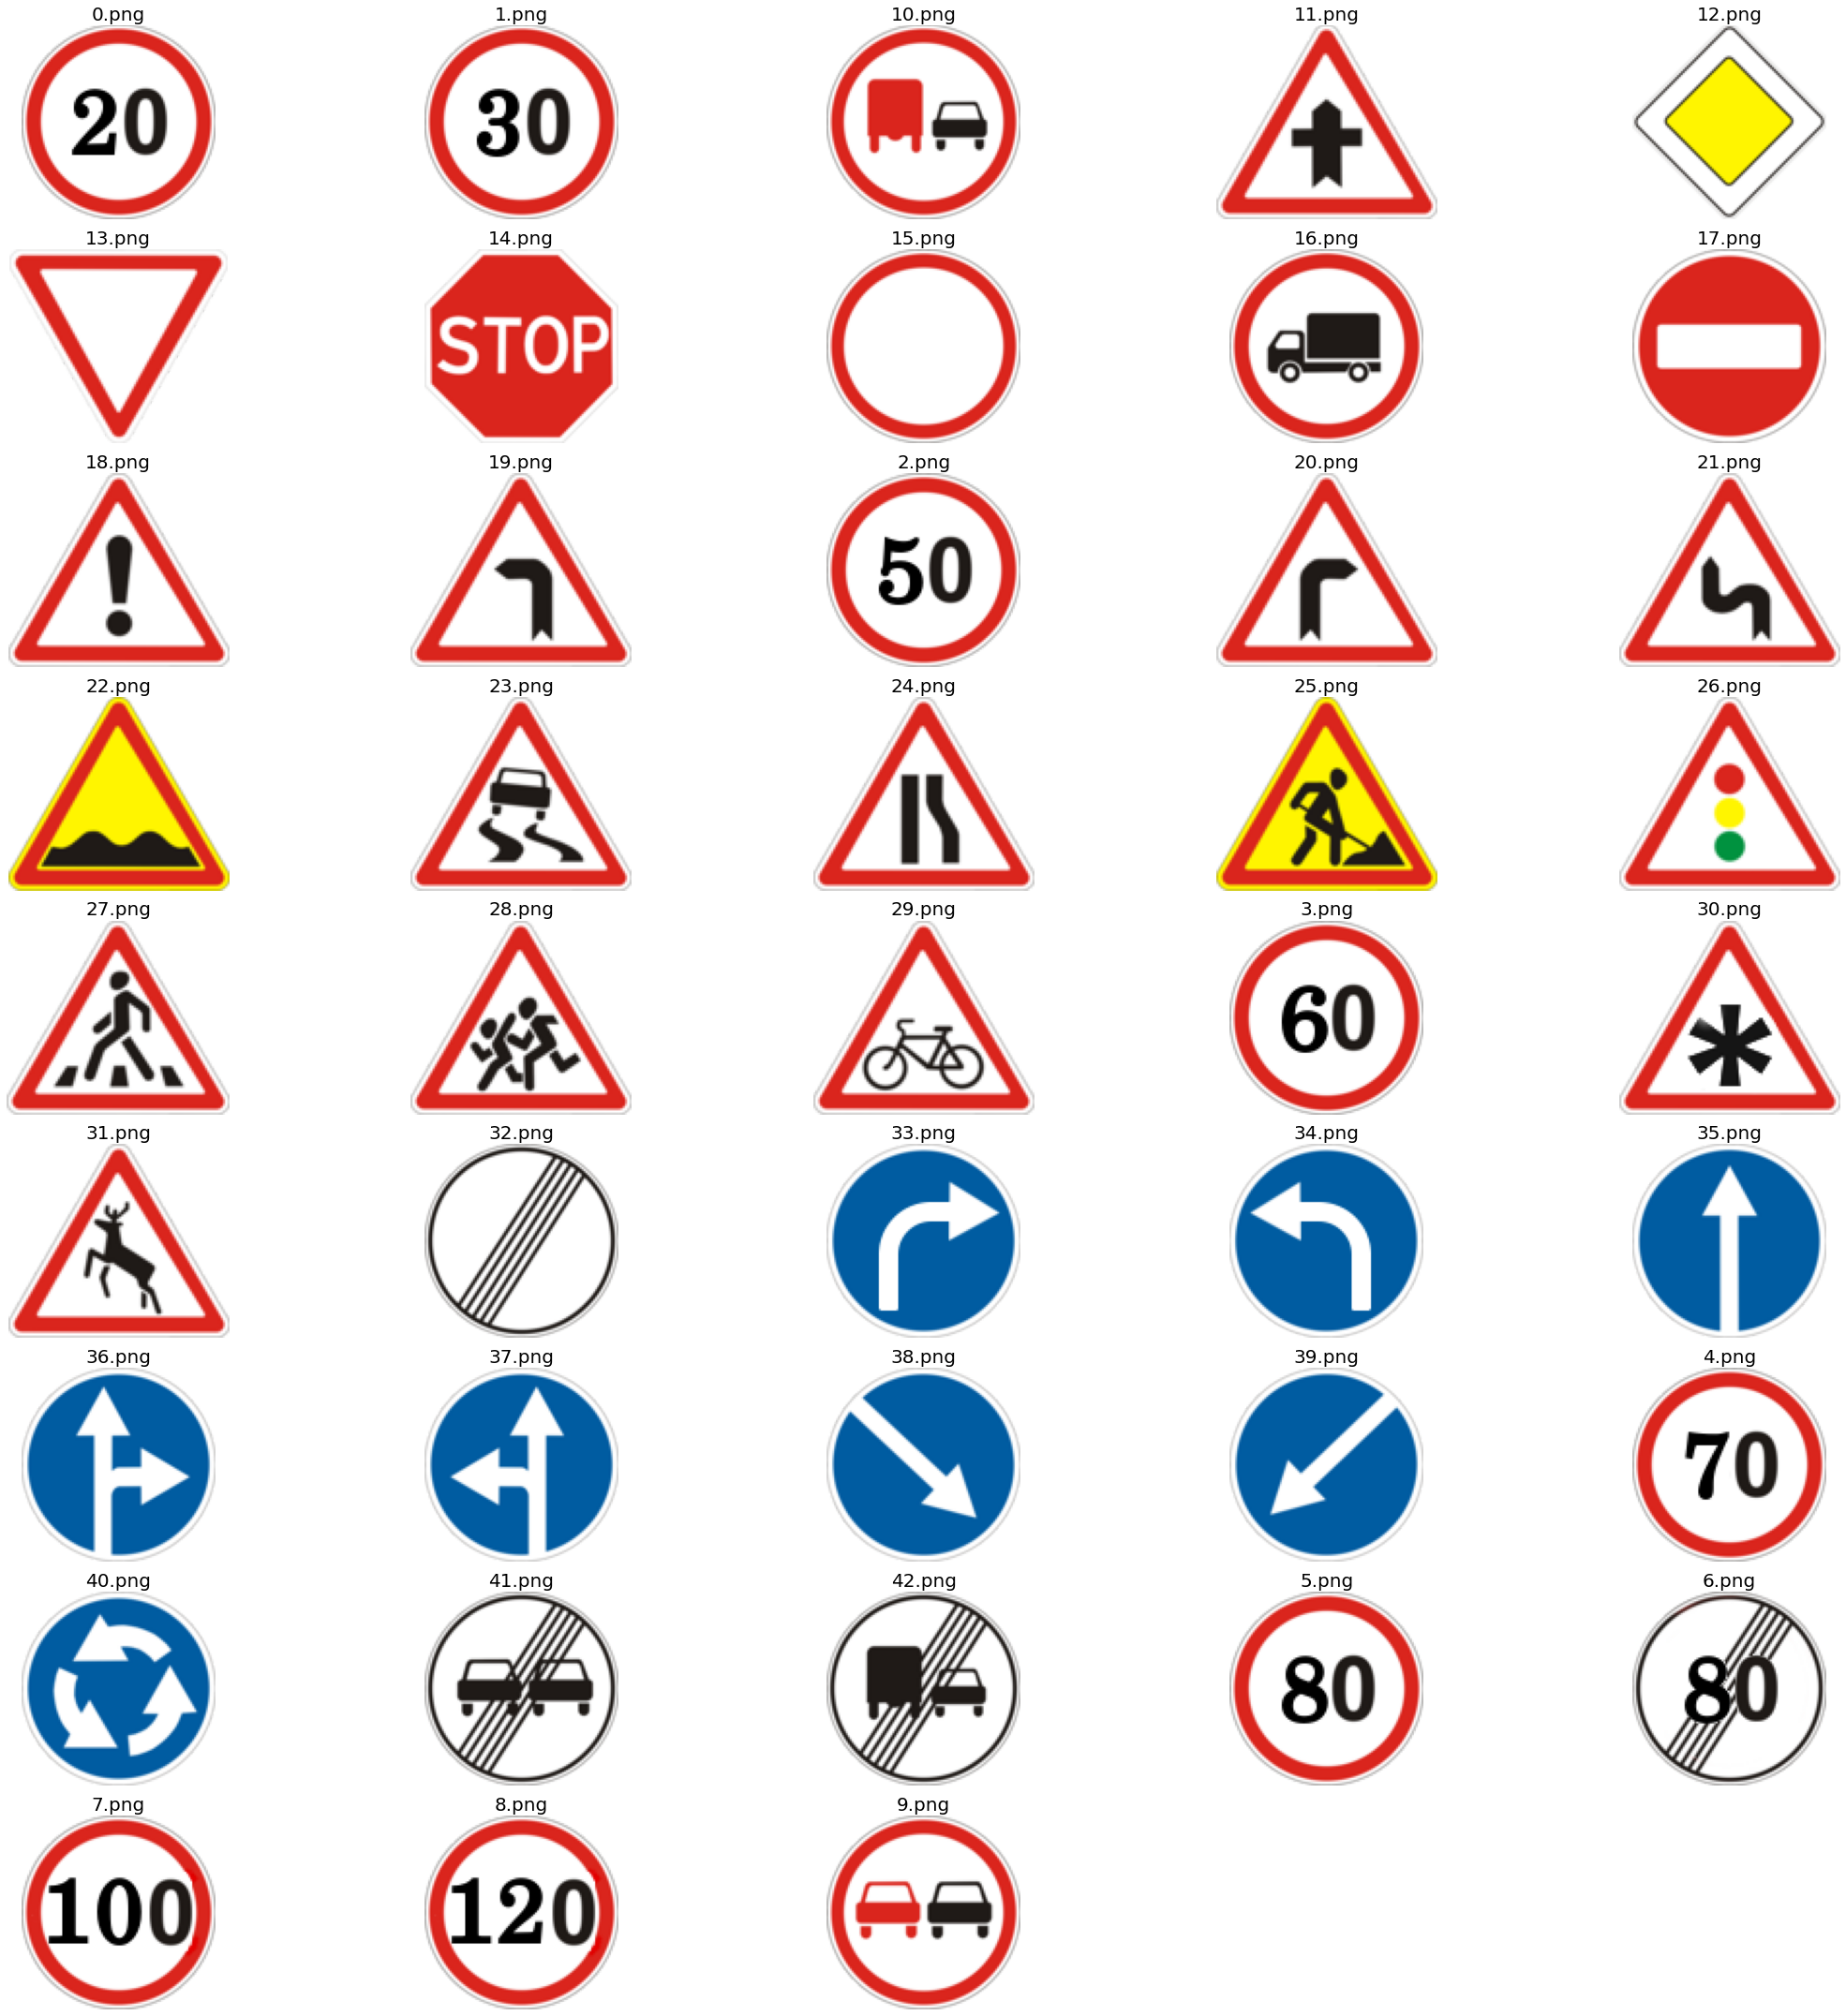

In [59]:
## Viewing images belonging to each class

plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
    img = Image.open(path+"/"+'Meta/'+file)
    ax = plt.subplot(9,5,i+1)
    ax.imshow(img)
    ax.set_title(file, size=20)
    plt.axis('off')
plt.tight_layout()

In [60]:
## Creating a dictionary for class labels

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }
           

## Bar chart of the Dataset

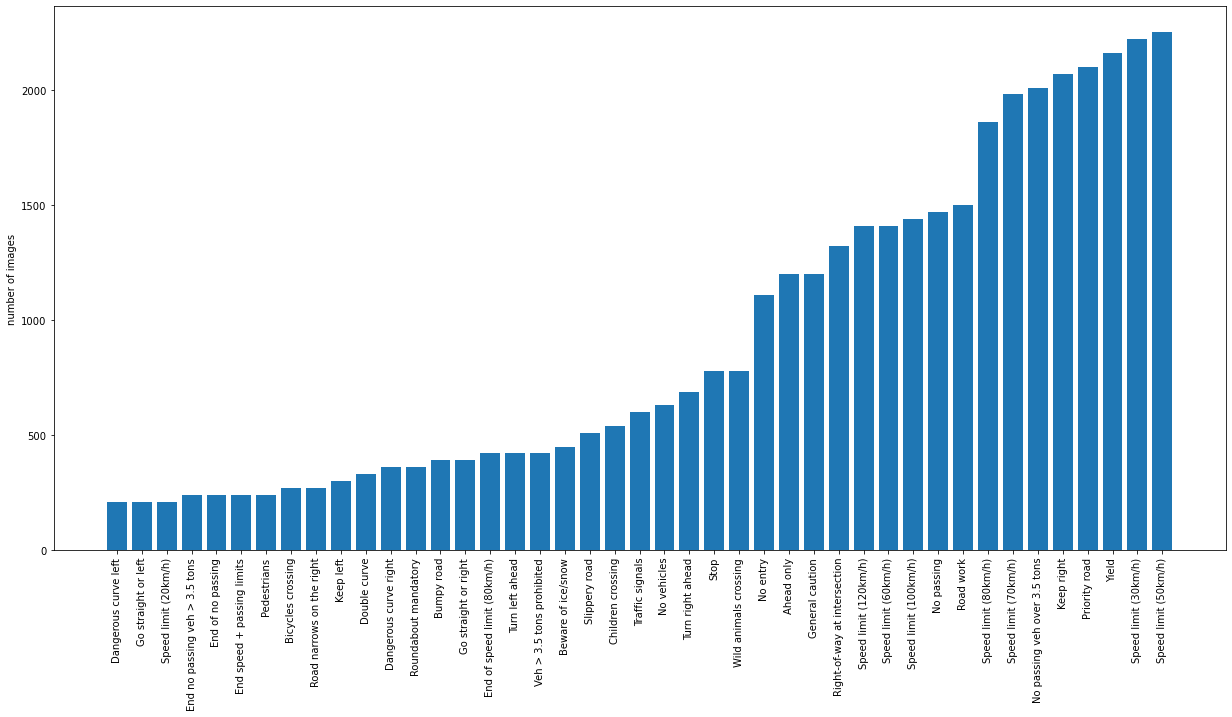

In [166]:
folders = os.listdir(path+"/"+'Train')

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(path+"/"+'Train'+ '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.ylabel('number of images')
plt.show()

In [64]:
train_df = pd.read_csv(path+"/"+'Train.csv')
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [65]:
train_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


### Preprocessing & visualizing Train-Test data

In [66]:
#The average dimensions of all images is about 50x50 pixels.
print(f'average width: {train_df.Width.mean()}')
print(f'average height: {train_df.Height.mean()}')

average width: 50.83587951745773
average height: 50.328929582493814


In [68]:
train_x =[]
for i in train_df.Path:
    img = Image.open(path+"/"+i)       # reading image
    img = img.resize((50,50))     # reasizing image
    train_x.append(np.array(img)) # saving image as array to train

train_y = np.array(train_df.ClassId)
train_x = np.array(train_x)
print(train_x.shape)
print(train_y.shape)

(39209, 50, 50, 3)
(39209,)


In [69]:
test_df = pd.read_csv(path+"/"+'Test.csv')
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [70]:
test_x =[]
for i in test_df.Path:
    img = Image.open(path+"/"+i)
    img = img.resize((50,50))
    test_x.append(np.array(img))

test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 50, 50, 3)
(12630,)


Speed limit (50km/h)


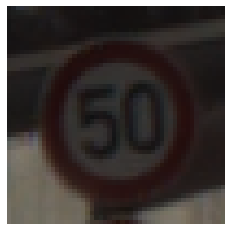

In [95]:
print(classes[train_y[5000]])
plt.imshow(train_x[5000])
plt.axis('off')
plt.show()

In [74]:
## Normalization

xtrain = train_x/255
xtest = test_x/255

In [77]:
# One Hot encoding

ytrain = keras.utils.to_categorical(train_y)
ytest = keras.utils.to_categorical(test_y)

In [168]:
ytrain.shape, ytest.shape

((31367, 43), (12630, 43))

### Creating CNN model

In [78]:
## Splitting into train and validation data

from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)
print(xtrain.shape)
print(xvalid.shape)
print(ytrain.shape)
print(yvalid.shape)

(31367, 50, 50, 3)
(7842, 50, 50, 3)
(31367, 43)
(7842, 43)


In [99]:
#Building model - CNN model contains two blocks, each containing two convolutional layers connected to one Max pooling layer

from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size= (5,5), strides=2, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 6, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)          102464    
                                                        

In [123]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [124]:
#fitting the model, with early stopping callback

earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights =True)

model_history = model.fit(xtrain,ytrain, batch_size=50,epochs=200, 5r
                          validation_data=(xvalid,yvalid),callbacks=[earlystop_cb])

Epoch 1/200
628/628 [==============================] - 71s 105ms/step - loss: 1.8989 - accuracy: 0.4146 - val_loss: 0.6509 - val_accuracy: 0.7687
Epoch 2/200
628/628 [==============================] - 83s 132ms/step - loss: 0.5684 - accuracy: 0.8059 - val_loss: 0.2282 - val_accuracy: 0.9317
Epoch 3/200
628/628 [==============================] - 57s 91ms/step - loss: 0.3203 - accuracy: 0.8975 - val_loss: 0.1342 - val_accuracy: 0.9623
Epoch 4/200
628/628 [==============================] - 52s 83ms/step - loss: 0.2286 - accuracy: 0.9279 - val_loss: 0.1277 - val_accuracy: 0.9606
Epoch 5/200
628/628 [==============================] - 53s 84ms/step - loss: 0.1840 - accuracy: 0.9413 - val_loss: 0.0855 - val_accuracy: 0.9744
Epoch 6/200
628/628 [==============================] - 51s 82ms/step - loss: 0.1598 - accuracy: 0.9493 - val_loss: 0.0702 - val_accuracy: 0.9791
Epoch 7/200
628/628 [==============================] - 52s 82ms/step - loss: 0.1323 - accuracy: 0.9599 - val_loss: 0.0692 - val_

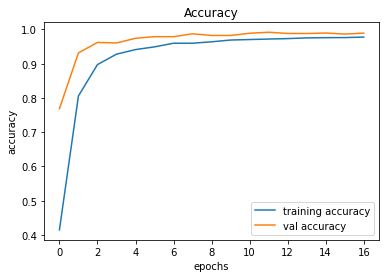

In [137]:
# accuracy 
plt.figure(0)
plt.plot(model_history.history['accuracy'], label='training accuracy')
plt.plot(model_history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

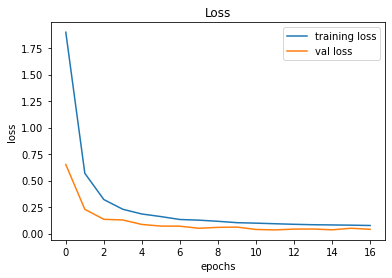

In [138]:
# Loss
plt.plot(model_history.history['loss'], label='training loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Evaluating model performance and making predictions

In [169]:
## Evaluating the model

loss, accuracy = model.evaluate(xtest,ytest)
print(f'Loss = {loss:.2f}%\naccuracy = {accuracy*100:.2f}%')

395/395 [==============================] - 9s 21ms/step - loss: 0.1882 - accuracy: 0.9515
Loss = 0.19%
accuracy = 95.15%


In [127]:
## Making predictions

prob = model.predict(xtest)
pred = np.argmax(prob, axis=-1)

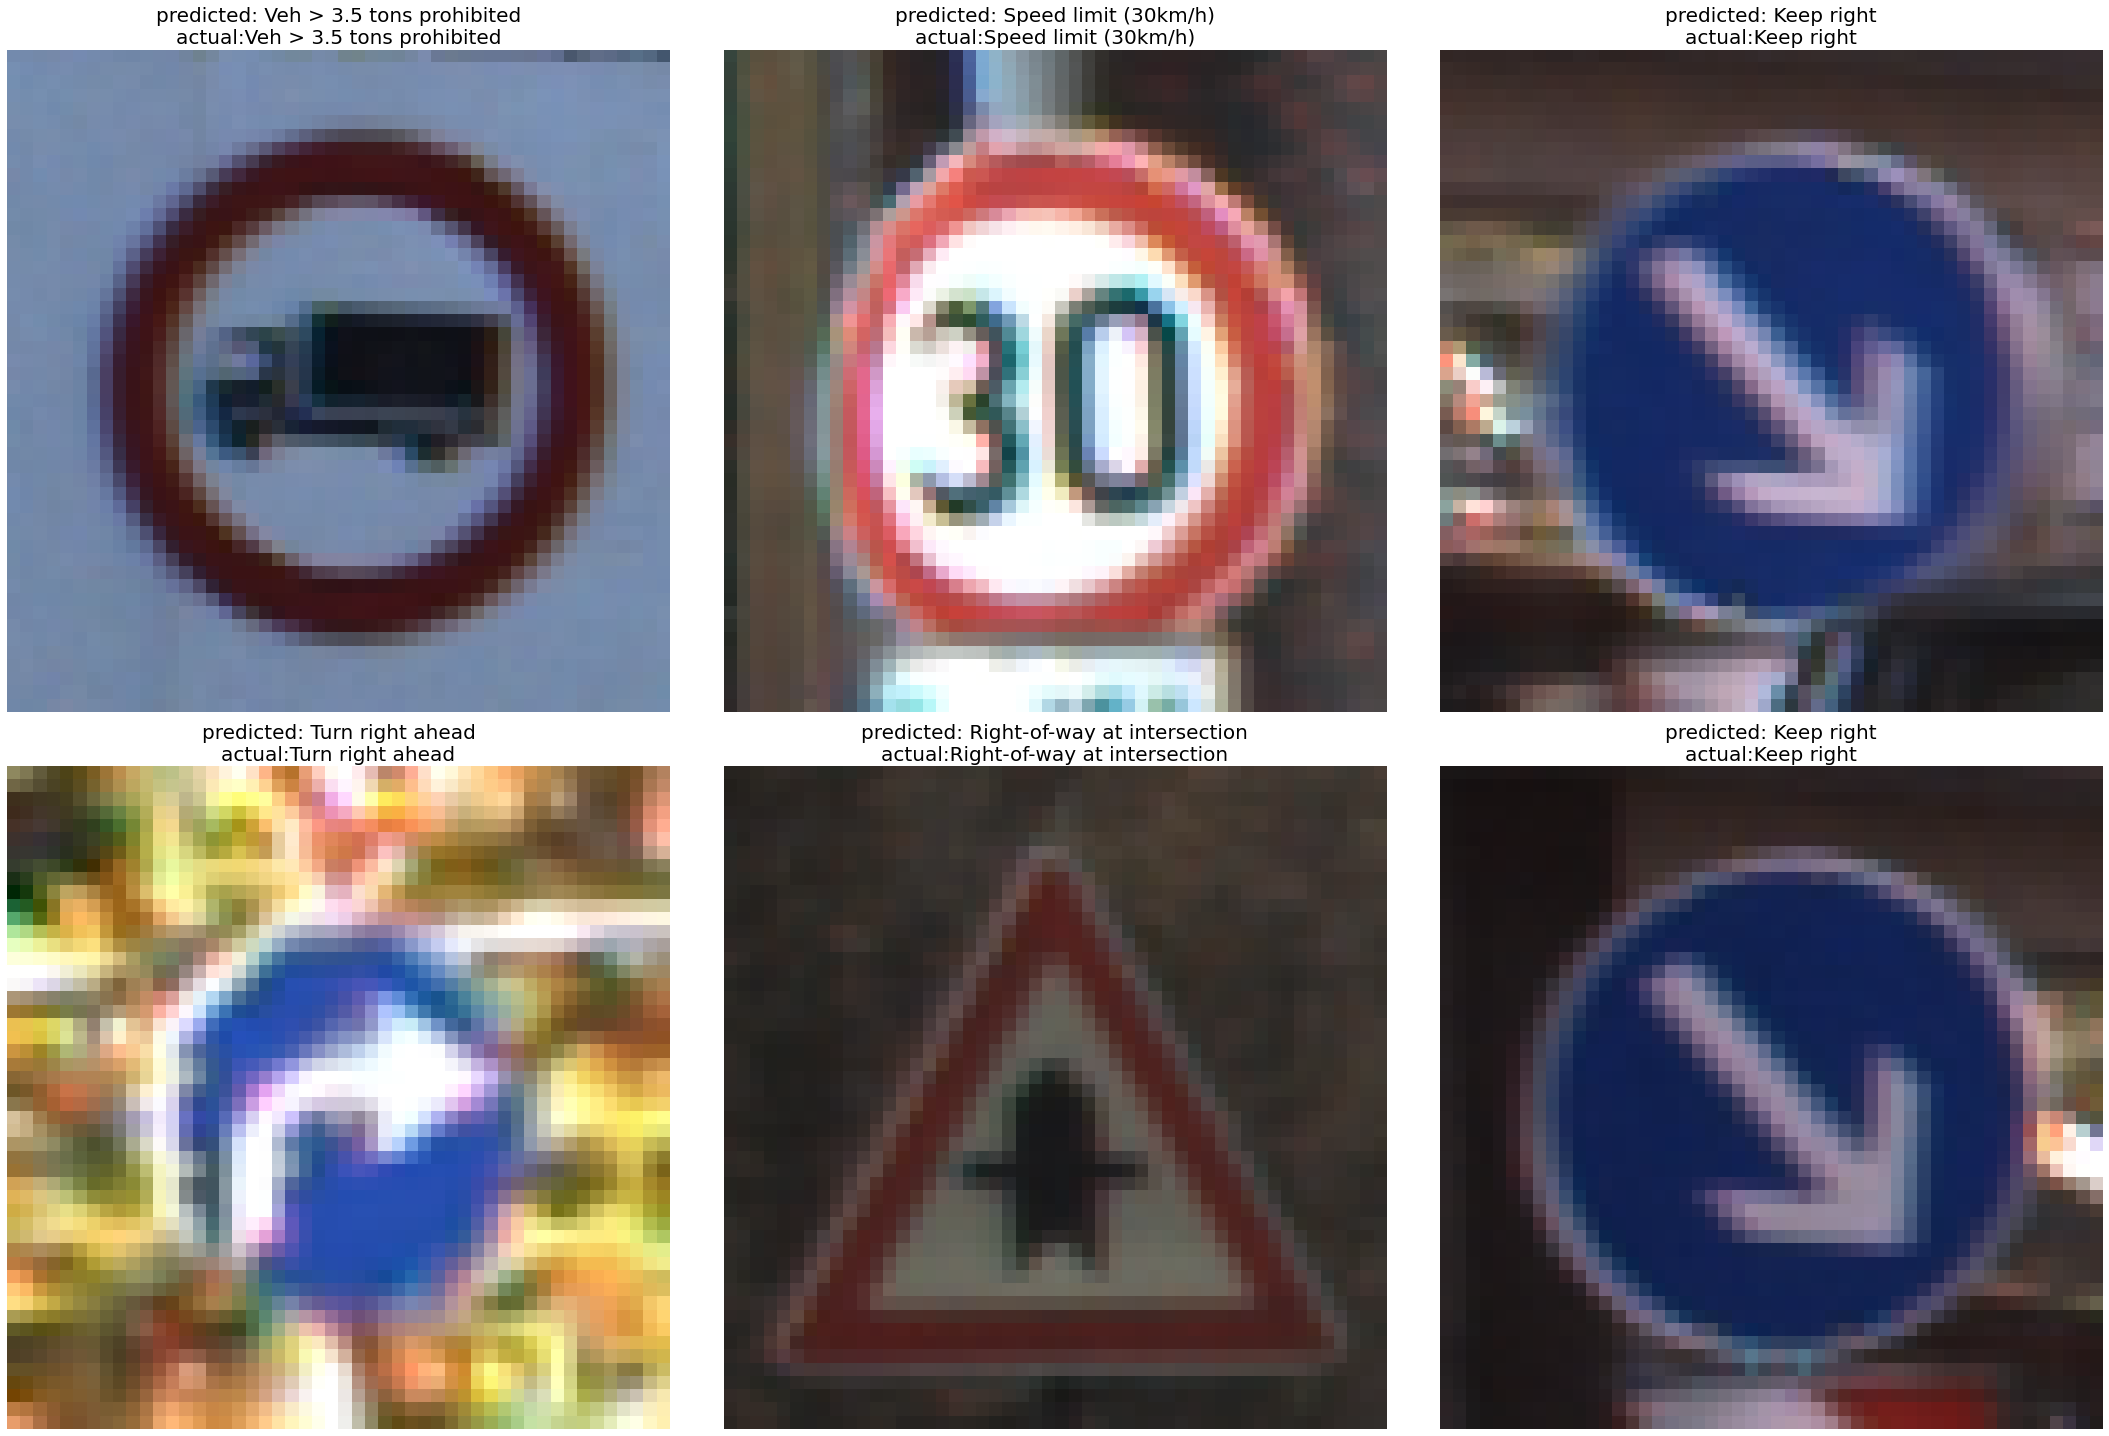

In [143]:
# print(prob[1])
plt.figure(figsize=(30,30))
for i in range(6):
    ax = plt.subplot(3,3,i+1)
    ax.imshow(xtest[i])
    ax.set_title(f'predicted: {classes[pred[i]]}\nactual:{classes[test_y[i]]}',fontsize=20)
    plt.axis('off')
    #plt.title('Temperature', fontsize=50)
plt.tight_layout()
plt.show()

In [164]:
labels = test_df["ClassId"].values

In [165]:
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        60
           1       0.96      0.97      0.97       720
           2       0.92      0.98      0.95       750
           3       0.93      0.96      0.94       450
           4       0.98      0.93      0.96       660
           5       0.95      0.87      0.91       630
           6       0.94      0.82      0.88       150
           7       0.97      0.91      0.94       450
           8       0.91      0.95      0.93       450
           9       0.98      1.00      0.99       480
          10       0.99      0.99      0.99       660
          11       0.95      0.96      0.95       420
          12       0.99      0.96      0.97       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      0.99      0.99       210
          16       0.99      0.97      0.98       150
          17       0.99    